## Data Preprocessing

In [16]:
# !pip3 install pandas
# !pip3 install scikit-learn

In [17]:
from PIL import Image
import numpy as np
import glob
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os

In [18]:
# file_list1 = glob.glob(r'/content/gdrive/MyDrive/Research Workspace/Dataset/Kaggle/Skin cancer data set/HAM10000_images_part_1/*.jpg')
# file_list2 = glob.glob(r'/content/gdrive/MyDrive/Research Workspace/Dataset/Kaggle/Skin cancer data set/HAM10000_images_part_2/*.jpg')
metadata_df = pd.read_csv('/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/dataset/ham10000/HAM10000_metadata.csv')


metadata_df = metadata_df[(metadata_df.dx != "akiec") & (metadata_df.dx != "bkl")&(metadata_df.dx != "df") & (metadata_df.dx != "bcc") & (metadata_df.dx != "vasc")]
dx = metadata_df['dx'].to_list()
# dx_type = metadata_df['dx_type'].to_list()
image_id = metadata_df['image_id'].to_list()
le = preprocessing.LabelEncoder()
dx_labels = list(le.fit_transform(dx))


In [19]:
print(dx)
print(dx_labels)
melC = 0
nvC = 0
indexLst = []
for i in range(len(dx)):
  if dx[i] == "nv" and nvC < 614:
    indexLst.append(i)
    nvC += 1
  if dx[i] == "mel" and melC < 614:
    indexLst.append(i)
    melC +=1


image_id2 = []
dx2 =[]
for i in indexLst:
  image_id2.append(image_id[i])
  dx2.append(dx[i])

print(image_id2)
print(len(dx2))

dx = dx2
# dx_type = metadata_df['dx_type'].to_list()
image_id = image_id2
le = preprocessing.LabelEncoder()
dx_labels = list(le.fit_transform(dx))

['nv', 'nv', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 'mel', 

In [20]:
len(image_id)

1228

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(image_id, dx_labels, stratify=dx_labels, test_size=0.201)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5)

sample_num = 0
splits = ['train', 'test', 'val']
X_data = [X_train, X_test, X_val]
y_data = [y_train, y_test, y_val]
for j in range(0, len(splits)):
    for i in range(0, len(X_data[j])):
        destination = '/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/dataset/VIT/BaseViT/' + splits[j] + '/' + str(y_data[j][i]) + '/' + X_data[j][i] + '.jpg'
        source = '/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/dataset/ham10000/' + X_data[j][i] + '.jpg'
        os.system("cp " + " " + source + " " + destination)
        sample_num+=1

In [22]:
print(len(X_data[0]))
print(len(X_data[1]))
print(len(X_data[2]))


981
124
123


In [23]:
len(y_train)

981

In [24]:
# !ls /content/gdrive/MyDrive/VIT/BaseVit/Dataset

## ViT base

In [25]:
# !pip install vit-pytorch
# !pip3 install seaborn


In [26]:
from __future__ import print_function
from PIL import Image
from vit_pytorch import ViT
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
import glob
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import pickle
import collections
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
import numpy as np
import seaborn as sn

In [27]:
# Setting CUDA Device:
torch.cuda.set_device(0)
# CUDA_VISIBLE_DEVICES= [1,2]

In [28]:
# Importing metadata:
total_df = pd.read_csv('/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/dataset/ham10000/HAM10000_metadata.csv')
file_list = glob.glob(r'/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/dataset/HAM1000Zip/skin-cancer-mnist-ham10000/HAM10000_images_part_2/*.jpg')

In [29]:
# Generating labels:
y_all = []
melC = 0
nvC = 0
file_list2 = []
for name in file_list:
    head, tail = os.path.split(name)
    # print(head,"###########", tail)
    tail = tail.replace('.jpg', '')
    row = ( total_df.loc [total_df['image_id'] == tail]['dx'] ).values.astype(str)
    # print(row)
    if str(row[0]) == "nv" and nvC < 614:
      y_all.append(str(row[0]))
      nvC += 1
      file_list2.append(name)
    if str(row[0]) == "mel" and melC < 614:
      y_all.append(str(row[0]))
      melC +=1
      file_list2.append(name)
print(len(y_all))
    

1228


In [30]:
y_all.count("mel")
len(file_list2)
file_list = file_list2

In [31]:
# Encodeing lables:
le = preprocessing.LabelEncoder()
y_all1 = le.fit_transform(y_all)

In [32]:
# print(y_all)
print(len(y_all1))

1228


In [33]:
# Applying test train split
X_train, X_temp, y_train, y_temp = train_test_split(file_list, y_all1, random_state=1, stratify=y_all1, test_size=0.201)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state=1, stratify=y_temp, test_size=0.5)


In [34]:
print(len(X_test))

124


In [35]:
# Creating Dataset:
data_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        # transforms.RandomHorizontalFlip(),
        # transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
    ]
)

In [36]:
class MyDataset(Dataset):
    def __init__(self, file_list, y_all, transform=None):
        self.file_list = file_list
        self.transform = transform
        self.y_all = y_all


    def __getitem__(self, index1):
        img_path = self.file_list[index1]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        label = self.y_all[index1]
        return img_transformed, label

    def __len__(self):
      return len(self.file_list)


In [37]:
train_data = MyDataset(X_train, y_train, transform=data_transforms)
valid_data = MyDataset(X_val, y_val, transform=data_transforms)
test_data = MyDataset(X_test, y_test, transform=data_transforms)

# Fixing Dataloader:
train_loader = DataLoader(dataset = train_data, batch_size=32, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=32, shuffle=True)


In [38]:
len(valid_loader)

4

In [39]:
for data, label in train_loader:
    print("........")
    print(data)

........
tensor([[[[0.8471, 0.8549, 0.8706,  ..., 0.4314, 0.4275, 0.4157],
          [0.8549, 0.8627, 0.8745,  ..., 0.4353, 0.4275, 0.4196],
          [0.8627, 0.8745, 0.8824,  ..., 0.4510, 0.4431, 0.4314],
          ...,
          [0.8275, 0.8353, 0.8471,  ..., 0.4353, 0.4196, 0.4039],
          [0.8235, 0.8353, 0.8431,  ..., 0.4196, 0.4078, 0.4000],
          [0.8157, 0.8314, 0.8431,  ..., 0.4118, 0.4039, 0.3922]],

         [[0.7569, 0.7686, 0.7843,  ..., 0.2275, 0.2275, 0.2275],
          [0.7569, 0.7765, 0.7882,  ..., 0.2314, 0.2392, 0.2314],
          [0.7608, 0.7765, 0.7882,  ..., 0.2431, 0.2471, 0.2392],
          ...,
          [0.4902, 0.4941, 0.5020,  ..., 0.2078, 0.1922, 0.1882],
          [0.4863, 0.4941, 0.4980,  ..., 0.2039, 0.1843, 0.1765],
          [0.4824, 0.4824, 0.4980,  ..., 0.1961, 0.1804, 0.1725]],

         [[0.7333, 0.7373, 0.7490,  ..., 0.2627, 0.2784, 0.2706],
          [0.7333, 0.7490, 0.7569,  ..., 0.2667, 0.2745, 0.2667],
          [0.7373, 0.7490, 0.7608

In [40]:
# Hyperparameters:
num_epochs = 100
# batch_size_list = [32, 64, 128]
batch_size = 32
# lr_list = [3e-5, 2e-4, 1e-3, 5e-6]
lr_list = [0.0001]
# gamma_list = [0.9, 0.7]  # for learning rate scheduler
gamma_list = [0.7]

In [41]:
# !pip3 install timm

In [42]:

# Model Specifications
# model = ViT(
#     image_size = 224,
#     patch_size = 32,
#     num_classes = 2,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048,
#     dropout = 0.1,
#     emb_dropout = 0.1
# ).to(torch.device("cuda"))

model = torch.hub.load('facebookresearch/deit:main','deit_tiny_patch16_224', pretrained=True).to(torch.device("cuda"))




Using cache found in /home/uditha/.cache/torch/hub/facebookresearch_deit_main


In [43]:

#start training
train_loss_list_list = []
val_loss_list_list = []
train_acc_list_list = []
val_acc_list_list = []

for lr in lr_list:
    for gamma in gamma_list:
        optimizer = optim.SGD(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()
        scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

        train_loss_list = []
        val_loss_list = []
        train_acc_list = []
        val_acc_list = []
        print("lr:", lr, "    gamma:", gamma)
        for epoch in range(num_epochs):
            epoch_loss = 0
            epoch_accuracy = 0
            for data, label in train_loader:
                data = data.to(torch.device("cuda"))
                label = label.to(torch.device("cuda"))
                output = model(data)
                loss = criterion(output, label)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                accuracy = (output.argmax(dim=1) == label).float().mean()
                epoch_accuracy += accuracy / len(train_loader)
                epoch_loss += loss / len(train_loader)
            with torch.no_grad():
                epoch_val_accuracy = 0
                epoch_val_loss = 0
                for data, label in valid_loader:
                    data = data.to(torch.device("cuda"))
                    label = label.to(torch.device("cuda"))
                    val_output = model(data)
                    val_loss = criterion(val_output, label)
                    acc = (val_output.argmax(dim=1) == label).float().mean()
                    epoch_val_accuracy += acc / len(valid_loader)
                    epoch_val_loss += val_loss / len(valid_loader)
            train_loss_list.append(epoch_loss.detach().cpu().numpy().flatten()[0])
            train_acc_list.append(epoch_accuracy.detach().cpu().numpy().flatten()[0])
            val_loss_list.append(epoch_val_loss.detach().cpu().numpy().flatten()[0])
            val_acc_list.append(epoch_val_accuracy.detach().cpu().numpy().flatten()[0])
            print(
                f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
            )
        val_acc_list_list.append(val_acc_list)
        val_loss_list_list.append(val_loss_list)
        train_acc_list_list.append(train_acc_list)
        train_loss_list_list.append(train_loss_list)


lr: 0.0001     gamma: 0.7
Epoch : 1 - loss : 5.2397 - acc: 0.1949 - val_loss : 1.2442 - val_acc: 0.6403

Epoch : 2 - loss : 0.8801 - acc: 0.6959 - val_loss : 0.6664 - val_acc: 0.7648

Epoch : 3 - loss : 0.6542 - acc: 0.7312 - val_loss : 0.6467 - val_acc: 0.7697

Epoch : 4 - loss : 0.5844 - acc: 0.7655 - val_loss : 0.5463 - val_acc: 0.7726

Epoch : 5 - loss : 0.5392 - acc: 0.7670 - val_loss : 0.5182 - val_acc: 0.7682

Epoch : 6 - loss : 0.5141 - acc: 0.7756 - val_loss : 0.6072 - val_acc: 0.7804

Epoch : 7 - loss : 0.4997 - acc: 0.7720 - val_loss : 0.5146 - val_acc: 0.7804

Epoch : 8 - loss : 0.4887 - acc: 0.7736 - val_loss : 0.4746 - val_acc: 0.7590

Epoch : 9 - loss : 0.4656 - acc: 0.7983 - val_loss : 0.4637 - val_acc: 0.7648

Epoch : 10 - loss : 0.4493 - acc: 0.7928 - val_loss : 0.4675 - val_acc: 0.7633

Epoch : 11 - loss : 0.4386 - acc: 0.7967 - val_loss : 0.4448 - val_acc: 0.7662

Epoch : 12 - loss : 0.4395 - acc: 0.7948 - val_loss : 0.4558 - val_acc: 0.7575

Epoch : 13 - loss : 0.4

In [44]:

torch.save(model.state_dict(), '/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/vit/Base Vit/FinalModelsSimple/ViT_model.pt')
metrices = [train_loss_list, val_loss_list, train_acc_list, val_acc_list]
with open("/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/vit/Base Vit/FinalModelsSimple/ViT_metrices.pk", "wb") as fp:   #Pickling
    pickle.dump(metrices, fp)

# a = []
# for i in range(0, num_epochs):
#     a.append(val_acc_list[i].detach().cpu().numpy().flatten()[0])
# maxi = []
# for i in range(0, 8):
#     maxi.append(max(val_acc_list_list[i]))



In [45]:
# loading model:
# oldP = "/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/vit/Base Vit/FinalModelsSimple/ViT_model.pth"
# model.load_state_dict(torch.load(oldP))
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=768, out_features=192, bias=True)
        (drop2): Dropout(p=0.0, inplace=Fals

In [46]:
# Creating Validation predictions and metrics:

pred = []
pred_label = []
i=0
criterion = nn.CrossEntropyLoss()
print(len(X_val))
for i in range(0,len(X_val)):
    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0

        for data, label in valid_loader: #! Change: test_loader --> valid_loader           
            if i%100==0:
                print("step: ", i)
            i +=1
            data = data.to(torch.device("cuda"))
            label = label.to(torch.device("cuda"))
            val_output = model(data)
            val_loss = criterion(val_output, label)
            pred.append(list(val_output.argmax(dim=1).detach().cpu().numpy()))
            pred_label.append(list(label.detach().cpu().numpy()))
            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

val_pred_flat = [item for sublist in pred for item in sublist]
val_pred_label_flat = [item for sublist in pred_label for item in sublist]

123
step:  0
step:  100
step:  100
step:  100
step:  100


In [47]:
# len(test_loader)
print(len(test_loader.dataset))

124


In [48]:
# Creating test set predictions and mertrices:

pred = []
pred_label = []
i=0
criterion = nn.CrossEntropyLoss()
print(len(X_test))
for i in range(0,len(X_test)):    
    # test_data = MyDataset([X_test[i]], [y_test[i]], transform=transforms)
    # test_loader = DataLoader(dataset = test_data, batch_size=1, shuffle=False)
    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0

        for data, label in test_loader:            
            if i%100==0:
                print("step: ", i)
            i +=1
            data = data.to(torch.device("cuda"))
            label = label.to(torch.device("cuda"))
            val_output = model(data)            
            val_loss = criterion(val_output, label)
            pred.append(list(val_output.argmax(dim=1).detach().cpu().numpy()))
            print(list(val_output.argmax(dim=1).detach().cpu().numpy()))
            pred_label.append(list(label.detach().cpu().numpy()))
            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(test_loader)
            epoch_val_loss += val_loss / len(test_loader)
        
        break

test_pred_flat = [item for sublist in pred for item in sublist]
test_pred_label_flat = [item for sublist in pred_label for item in sublist]

predictions = [val_pred_flat, val_pred_label_flat, test_pred_flat, test_pred_label_flat]
with open("/home/uditha/snap/snapd-desktop-integration/current/Desktop/FYP/vit/Base Vit/FinalModelsSimple/ViT_predictions.pk", "wb") as fp:   #Pickling
    pickle.dump(predictions, fp)

124
step:  0
[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]


In [49]:
test_pred_flat_1 = [len(sublist) for sublist in pred ]



ViT MODEL:  
              precision    recall  f1-score   support

           0     0.8065    0.8065    0.8065        62
           1     0.8065    0.8065    0.8065        62

    accuracy                         0.8065       124
   macro avg     0.8065    0.8065    0.8065       124
weighted avg     0.8065    0.8065    0.8065       124

[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]


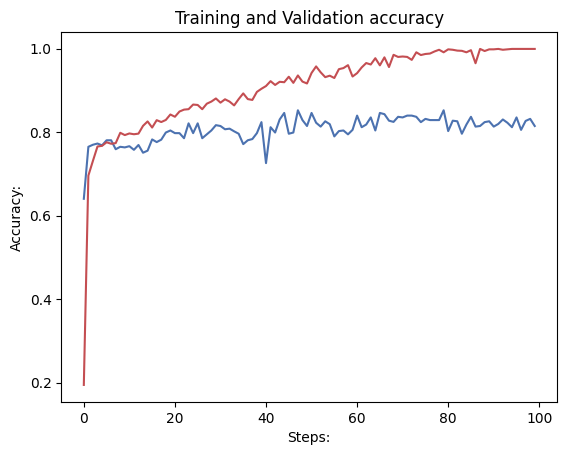

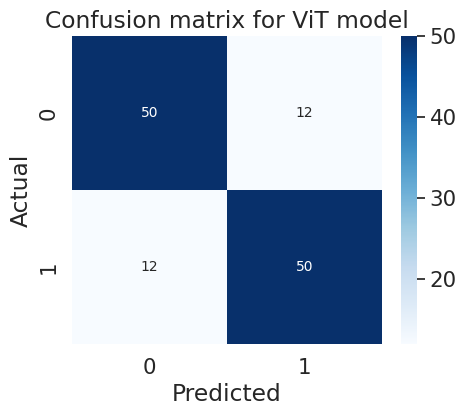

In [50]:

# Plotting training and val accuracy with training steps:
train_acc_list = metrices[2]
val_acc_list = metrices[3]

plt.plot(range(0,len(val_acc_list)), val_acc_list, color='b', label='Validation accuracy')
plt.plot(range(0,len(train_acc_list)), train_acc_list, color='r', label='Training accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel("Steps:")
plt.ylabel("Accuracy:")

# Precsion and recall:
# with open('./final_models_simple/ViT_predictions.pk', 'rb') as f:
#     predictions = pickle.load(f)

val_pred_flat = predictions[0]
val_pred_label_flat = predictions[1]
test_pred_flat = predictions[2]
test_pred_label_flat = predictions[3]
print("\n\nViT MODEL:  ")
print(classification_report(test_pred_flat, test_pred_label_flat,digits=4))
# Confusion Matrix:
y_true = test_pred_label_flat
y_pred = test_pred_flat
print(y_true)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size":10}, fmt='d')# font size
plt.title("Confusion matrix for ViT model")
plt.show()

In [51]:
data

array([[50, 12],
       [12, 50]])

In [52]:
len(predictions[1])

15129